In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

In [2]:
mnist = fetch_openml('mnist_784') # already flatten

In [3]:
sample = np.random.randint(70000, size=10000)
data = mnist.data[sample]
target = mnist.target[sample]
data_df = pd.DataFrame(data)
data_df
# we renormalize the data around 0 [-0.5, 0.5]
#norm_data = (data / 255) - 0.5
#print(norm_data.shape)

xtrain, xtest, ytrain, ytest = train_test_split(data_df, target, test_size=0.33, shuffle= True)


NameError: name 'pd' is not defined

In [ ]:
# mod from here...

In [4]:
# 10 clusters
n_clusters = len(np.unique(target))
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
# Train K-Means.
y_pred = kmeans.fit(xtrain)
#y_pred_kmeans = kmeans.fit_predict(data)

[9 7 5 ... 8 8 3]
83


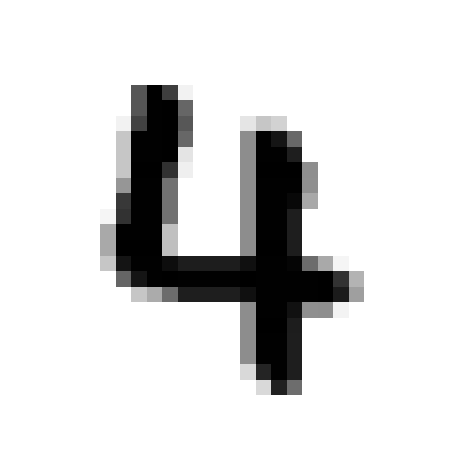

In [5]:
y_label_train = kmeans.labels_
print(y_label_train)

# def plot_clusters(predict, y, stats):
#     for i in range(10):
#         indices = np.where(predict == i)
#         title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
#         plot_ds(X_train[indices][:25], title, y[indices])
index_0 = np.where(kmeans.labels_ == 0)
print(index_0[0][5])

# We transform the data in form of images
images = xtest.reshape((-1, 28, 28))

# We randomly pick 12 images
select = np.random.randint(images.shape[0], size=12)

fig = plt.figure(figsize=(10,8))
# We plot the images with their prediction
# for index, value in enumerate(select):
#     fig.add_subplot(3,4,index+1)
#     plt.axis('off')
#     plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
#     #plt.title('Predicted: {}'.format(predicted[value]))
    
plt.axis('off')
plt.imshow(images[index_0[0][0]],cmap=plt.cm.gray_r,interpolation="nearest")


In [39]:
# y_pred won't necessarily correspond to the label. We need to associate the cluster label from k_means with
# the data label in order to measure accuracy:
labels = []
for i in range(kmeans.n_clusters):
    index = np.where(kmeans.labels_ == i)
    print(index)
    labels.append(actual_labels[index])

#print(labels)
    

(array([   1,    3,    4, ..., 9997, 9998, 9999]),)


NameError: name 'actual_labels' is not defined

In [38]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

for i in range(kmeans.n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)

    # append actual labels for each point in cluster
    labels.append(actual_labels[index])

    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    #print(labels)
    #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

for i, cluster in enumerate(X_labels):
    for key, value in cluster_labels.items():
        if cluster in value:
            predicted_labels[i] = key
            
return predicted_labels


NameError: name 'actual_labels' is not defined

In [21]:
kmeans.labels_

array([9, 0, 9, ..., 0, 0, 0], dtype=int32)

In [22]:
kmeans.cluster_centers_

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       ...,
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]])

In [31]:
print(y_pred)

[9 0 9 ... 0 0 0]


AxisError: axis 1 is out of bounds for array of dimension 1